## Step 0: Importing Libraries

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import transform
import cv2 as cv2
import seaborn as sns

## Step 1: Importing Data

In [2]:
df = pd.read_csv('section3.csv')
df.head()

,Image,Label
0,./data/Marlon_Devonish/Marlon_Devonish_0001.jpg,Marlon_Devonish
1,./data/Dolly_Parton/Dolly_Parton_0002.jpg,Dolly_Parton
2,./data/Dolly_Parton/Dolly_Parton_0001.jpg,Dolly_Parton
3,./data/Rocco_Buttiglione/Rocco_Buttiglione_000...,Rocco_Buttiglione
4,./data/Brandon_Lloyd/Brandon_Lloyd_0001.jpg,Brandon_Lloyd


## Step 2: Data Preprocessing

### Step 2.1: Cleaning Data

In [3]:
df_count = df.groupby('Label').count().sort_values(by = df.columns[0], ascending=False)
df_count.columns = ['ImageCount']
df_count

,ImageCount
Label,
George_W_Bush,530
Colin_Powell,236
Tony_Blair,144
Donald_Rumsfeld,121
Gerhard_Schroeder,109
Ariel_Sharon,77
Hugo_Chavez,71
Junichiro_Koizumi,60
Jean_Chretien,55


In [4]:
df_filter = df_count[(df_count['ImageCount']) >= 50 ]
df_filter

,ImageCount
Label,
George_W_Bush,530
Colin_Powell,236
Tony_Blair,144
Donald_Rumsfeld,121
Gerhard_Schroeder,109
Ariel_Sharon,77
Hugo_Chavez,71
Junichiro_Koizumi,60
Jean_Chretien,55


In [5]:
list_index = df_filter.index.tolist()
df_filter.index

Index(['George_W_Bush', 'Colin_Powell', 'Tony_Blair', 'Donald_Rumsfeld',
       'Gerhard_Schroeder', 'Ariel_Sharon', 'Hugo_Chavez', 'Junichiro_Koizumi',
       'Jean_Chretien', 'John_Ashcroft', 'Jacques_Chirac', 'Serena_Williams'],
      dtype='object', name='Label')

In [6]:
final_df = df.loc[df['Label'].isin(list_index)]
final_df.shape

(1560, 2)

In [7]:
final_df.head()

,Image,Label
489,./data/George_W_Bush/George_W_Bush_0394.jpg,George_W_Bush
490,./data/George_W_Bush/George_W_Bush_0377.jpg,George_W_Bush
491,./data/George_W_Bush/George_W_Bush_0204.jpg,George_W_Bush
492,./data/George_W_Bush/George_W_Bush_0203.jpg,George_W_Bush
493,./data/George_W_Bush/George_W_Bush_0416.jpg,George_W_Bush


### Step 2.2: Image Cropping

In [8]:
X = []
y = []
X_dict = {}

for index, row in final_df.iterrows():
    local_image =cv2.cvtColor( cv2.imread(row[0]) , cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(local_image, (96, 96))
    resized_image = resized_image[10:86,10:86]
    if row[1] not in X_dict:
        X_dict[row[1]] = [resized_image]
    else:
        X_dict[row[1]].append(resized_image)
    X.append( resized_image)
    y.append(row[1])

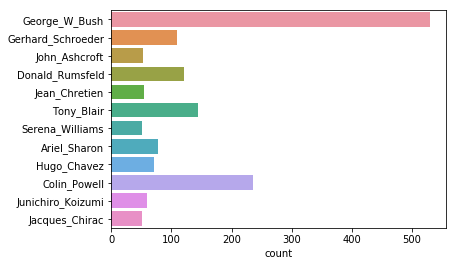

In [9]:
sns.countplot(y = y)

### Step 2.3 Image Augmentation and Class Balancing

In [10]:
def imgAug(img):
    result  = 255 *  transform.rotate(img, angle=np.random.uniform(-30,30), mode='edge')
    result = result.astype(np.uint8)
    return result

In [11]:
median = 400
X_updated = {}
X_augmented = []
y_augmented = []
for key, value in X_dict.items():
    if len(value) < 400:
        temp_values  = []
        for every_value in value:
            temp_values.append(every_value)
        i=0
        while(len(temp_values) != 400):
            if(i< len(value)):
                temp_image = imgAug(value[i])
                temp_values.append(temp_image)
                i=i+1
            else:
                i=0
        for every_value in temp_values:
            X_augmented.append(every_value)
            
        for j in range(len(temp_values)):
            y_augmented.append(key)
    else:
        temp_values = value[:400]
        for every_value in temp_values:
            X_augmented.append(every_value)
        for j in range(len(temp_values)):
            y_augmented.append(key)

In [12]:
np.array(X_augmented).shape

(4800, 76, 76, 3)

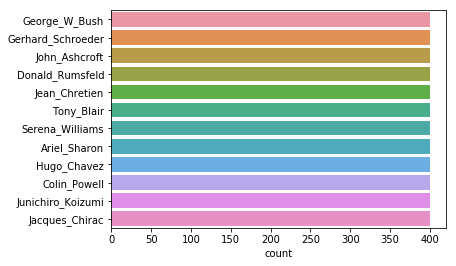

In [13]:
sns.countplot(y=y_augmented)

In [14]:
X = np.array(X_augmented)
y = np.array(y_augmented)

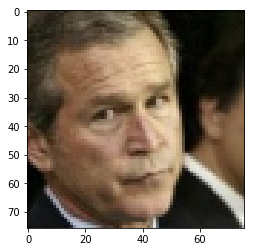

In [15]:
plt.imshow(X[0])

(4800, 76, 76, 3)

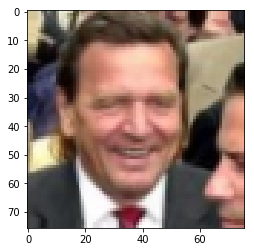

In [16]:
plt.imshow(X[789])
X.shape

## Step 3: One Hot Encoding Labels

In [17]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
lblEncoder = LabelEncoder()
y = lblEncoder.fit_transform(y)
print(y.shape)
y = y.reshape(len(y), 1)
print(y.shape)
onehot = OneHotEncoder(sparse=False)
y = onehot.fit_transform(y)
print(y.shape)

(4800,)
(4800, 1)
(4800, 12)


In [18]:
X[0].shape

(76, 76, 3)

## Step 4: Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle=True)

## Step 5: Modelling Data using CNN

In [55]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Convolution2D, Lambda, Flatten, Dropout
from keras.callbacks import History
from keras.optimizers import Adam

In [29]:
model = Sequential()
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape= (76,76,3)))
model.add(Convolution2D(filters= 3 , kernel_size= 3 , strides= (1,1) , padding='same', activation='relu' ))
model.add(Convolution2D(filters= 8 , kernel_size= 3 , strides= (1,1) , padding='valid', activation='relu' ))
model.add(Convolution2D(filters= 32 , kernel_size= 3 , strides= (1,1) , padding='valid', activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2) , strides=2))
model.add(Convolution2D(filters= 64 , kernel_size= 3 , strides= (1,1) , padding='valid', activation='relu' ))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation='softmax'))

In [30]:
model.compile(optimizer=Adam(lr = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [32]:
model.fit(X_train,y_train , validation_split= 0.1 , verbose=1, epochs= 10, batch_size=16)

Train on 3888 samples, validate on 432 samples
Epoch 1/10
3888/3888 [==============================] - 5s 1ms/step - loss: 1.9289 - acc: 0.3387 - val_loss: 1.5046 - val_acc: 0.5556
Epoch 2/10
3888/3888 [==============================] - 5s 1ms/step - loss: 1.4286 - acc: 0.5244 - val_loss: 1.0158 - val_acc: 0.7060
Epoch 3/10
3888/3888 [==============================] - 5s 1ms/step - loss: 1.0594 - acc: 0.6548 - val_loss: 0.7003 - val_acc: 0.8125
Epoch 4/10
3888/3888 [==============================] - 5s 1ms/step - loss: 0.7486 - acc: 0.7572 - val_loss: 0.5624 - val_acc: 0.8565
Epoch 5/10
3888/3888 [==============================] - 5s 1ms/step - loss: 0.5838 - acc: 0.8089 - val_loss: 0.4227 - val_acc: 0.8843
Epoch 6/10
3888/3888 [==============================] - 5s 1ms/step - loss: 0.4444 - acc: 0.8516 - val_loss: 0.4054 - val_acc: 0.8704
Epoch 7/10
3888/3888 [==============================] - 5s 1ms/step - loss: 0.3639 - acc: 0.8755 - val_loss: 0.3655 - val_acc: 0.8912
Epoch 8/10
3888

## Step 6: Saving Model for Later Use

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_4 (Lambda)            (None, 76, 76, 3)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 76, 76, 3)         84        
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 74, 74, 8)         224       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 32)        2336      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
flatten_3 (Flatten)          (None, 73984)             0         
__________

In [34]:
model.save('model_v1.h5')

## Step 8: Visualizing Losses and Accuracy

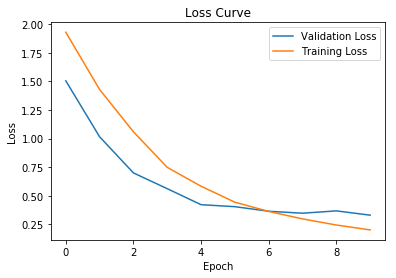

In [66]:
val_loss = model.model.history.history['val_loss']
tra_loss = model.model.history.history['loss']

plt.plot(val_loss)
plt.plot(tra_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(['Validation Loss', 'Training Loss'])
plt.show()

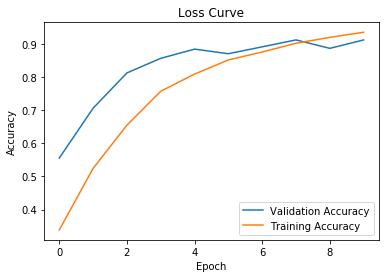

In [67]:
val_acc = model.model.history.history['val_acc']
tra_acc = model.model.history.history['acc']

plt.plot(val_acc)
plt.plot(tra_acc)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Loss Curve')
plt.legend(['Validation Accuracy', 'Training Accuracy'])
plt.show()

## Step 9: Testing Trained Neural Network

In [39]:
from tensorflow import keras
from keras.models import load_model

In [40]:
saved_model = load_model('model_v1.h5')

In [45]:
y_pred = saved_model.predict(x = X_test , batch_size= 16)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [49]:
print(classification_report( np.argmax(y_test,1) , np.argmax(y_pred,1)))

             precision    recall  f1-score   support

          0       0.84      0.97      0.90        38
          1       0.88      0.82      0.85        55
          2       0.87      0.79      0.82        42
          3       0.83      0.92      0.87        37
          4       0.88      0.91      0.89        56
          5       0.85      0.91      0.88        32
          6       0.89      1.00      0.94        32
          7       0.91      0.94      0.92        51
          8       0.91      0.97      0.94        31
          9       0.94      0.97      0.95        30
         10       0.97      1.00      0.98        30
         11       0.90      0.59      0.71        46

avg / total       0.89      0.89      0.88       480



In [52]:
print('Test Accuracy:',accuracy_score(np.argmax(y_test,1) , np.argmax(y_pred,1)))

Test Accuracy: 0.8854166666666666


In [53]:
print(confusion_matrix(np.argmax(y_test,1) , np.argmax(y_pred,1)))

[[37  0  0  0  0  0  0  1  0  0  0  0]
 [ 2 45  3  1  0  0  2  0  0  0  0  2]
 [ 2  3 33  1  0  1  0  2  0  0  0  0]
 [ 0  1  1 34  0  1  0  0  0  0  0  0]
 [ 0  0  0  1 51  2  1  0  1  0  0  0]
 [ 0  1  0  0  2 29  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 32  0  0  0  0  0]
 [ 2  0  0  0  0  0  1 48  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 30  0  0  1]
 [ 0  0  0  0  1  0  0  0  0 29  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 30  0]
 [ 1  1  1  4  4  1  0  2  2  2  1 27]]
